In [23]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2020-02-02Einstein_Radius_resnet18.mdl'
#loaded_model_path = './saved_model/2019-12-19n_sources_resnet18.mdl'
# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


In [24]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/Einstein_area_train.csv')

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/Einstein_area_val.csv')

    def __getitem__(self, index):

        #print(self.df['ID'])
        ID = self.df['ID'].iloc[[index]]
        score = self.df['score'].iloc[[index]]
        #n_sources = self.df['n_sources'].iloc[[index]]
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        ein_area = self.df['ein_area'].iloc[[index]]  ### square rad
        Einstein_Radius = (180/np.pi) * 3600. * (ein_area**0.5) # in arcsec
        #print("Einstein_Radius", Einstein_Radius.values[0])
        #print("mag_eff", mag_eff.values[0])

        #if
        #Einstein_Radius = 1
        # filepath = "/media/joshua/HDD_fun2/Public/EUC_Y/imageEUC_Y-" + str(ID.values[0]) + ".fits"
        # lens_data = fits.open(filepath)
        # img = lens_data[0].data
        image = np.zeros((4, 224, 224))
        rotation_seed = np.random.randint(low=0, high = 4)
        #print("rotation_seed", rotation_seed)
        try:
            for i, channel in enumerate(channel_names):

                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img *= 10e8
                img = np.rot90(img, rotation_seed)
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
        except:
            print("error", ID)
            pass



        # if self.transform is not None:
        #     #image = image.astype(np.uint8)
        #     print(image.dtype)
        #     image = Image.fromarray(image)
        #     #test_data = data_transforms['test'](transforms.ToPILImage()(test_data))
        #     image = self.transform(image)

        return image, ID.values[0], score.values[0], Einstein_Radius.values[0]#n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]

In [25]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

rotation_seed 0
Einstein_radius (ground truth) 4.8148456
Einstein_radius prediction: 3.893929
score tensor([0.8850], dtype=torch.float64)


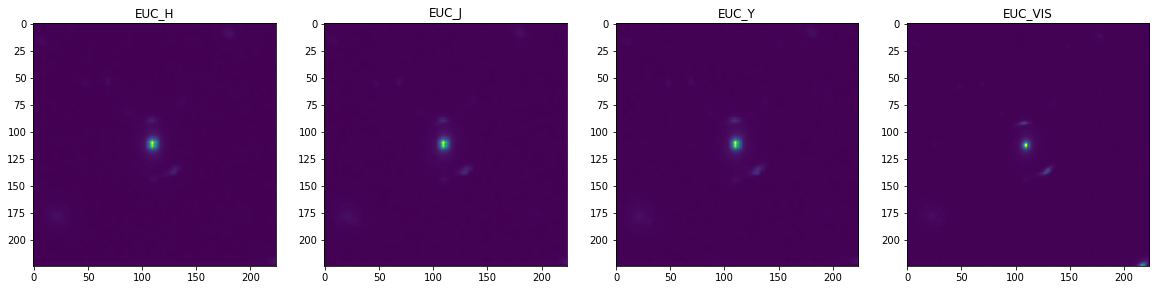

______
rotation_seed 1
Einstein_radius (ground truth) 3.5749683
Einstein_radius prediction: 3.7654002
score tensor([0.9199], dtype=torch.float64)


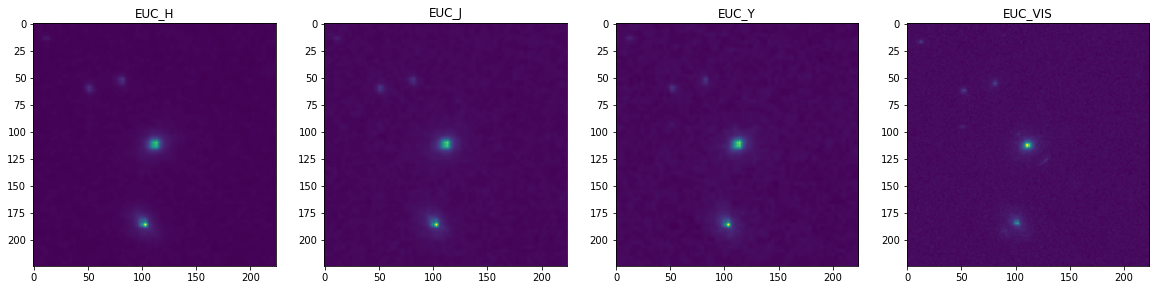

______
rotation_seed 2
Einstein_radius (ground truth) 2.7522635
Einstein_radius prediction: 3.0402658
score tensor([0.9936], dtype=torch.float64)


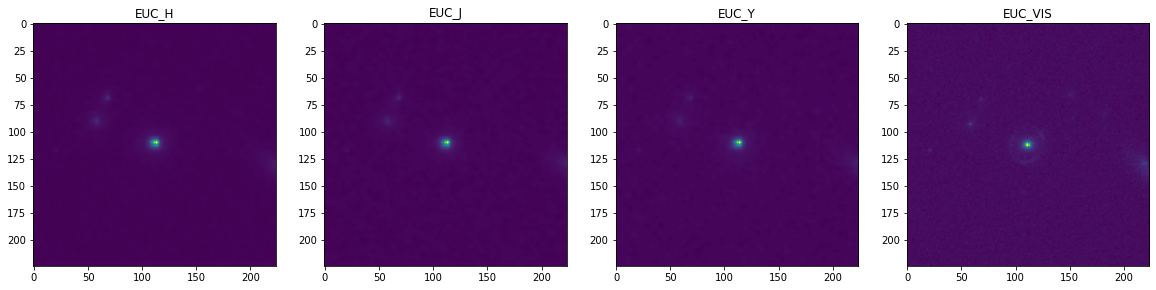

______
rotation_seed 2
Einstein_radius (ground truth) 3.1990666
Einstein_radius prediction: 3.3675373
score tensor([0.9911], dtype=torch.float64)


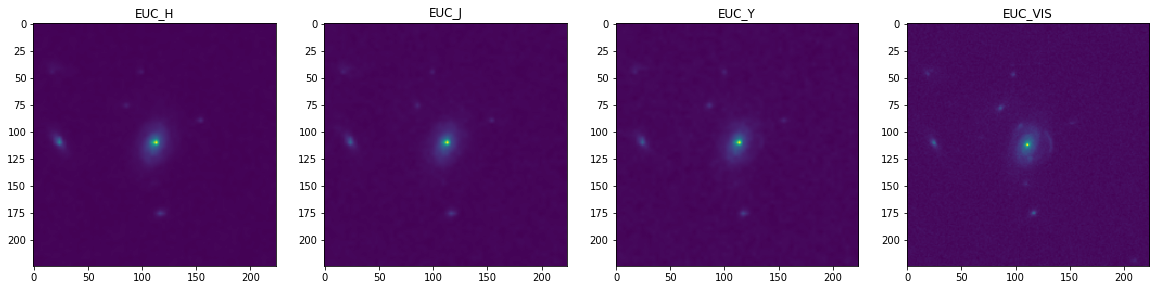

______
rotation_seed 0
Einstein_radius (ground truth) 3.002007
Einstein_radius prediction: 2.907324
score tensor([0.9522], dtype=torch.float64)


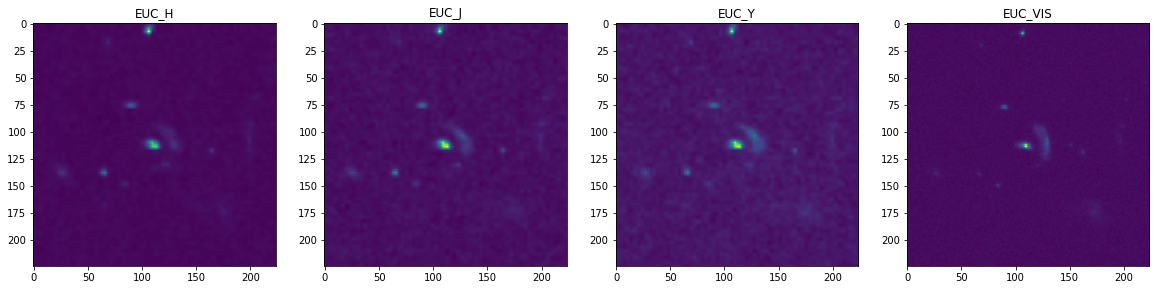

______
rotation_seed 0
Einstein_radius (ground truth) 3.1750445
Einstein_radius prediction: 3.0001664
score tensor([0.8485], dtype=torch.float64)


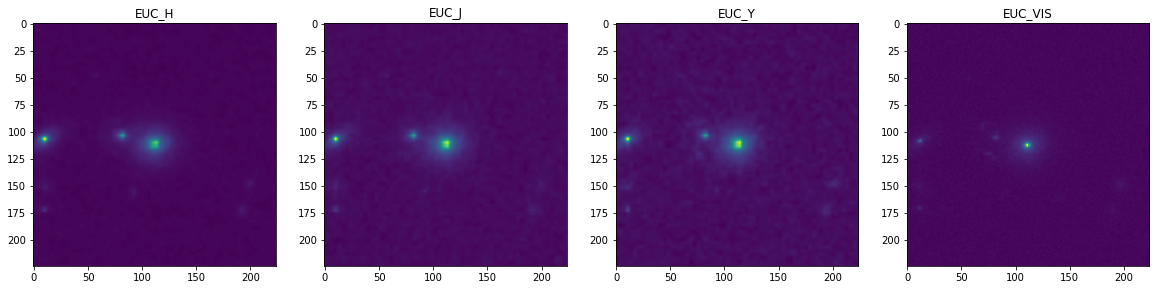

______
rotation_seed 3
Einstein_radius (ground truth) 3.770259
Einstein_radius prediction: 3.5995827
score tensor([0.9965], dtype=torch.float64)


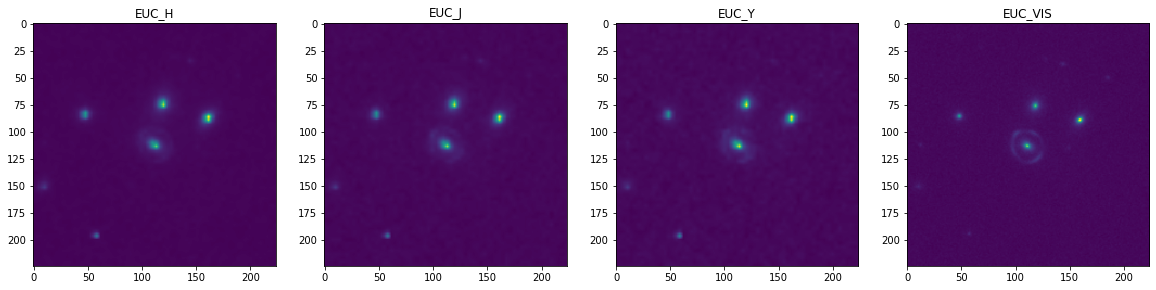

______
rotation_seed 3
Einstein_radius (ground truth) 3.1716392
Einstein_radius prediction: 3.291867
score tensor([0.9980], dtype=torch.float64)


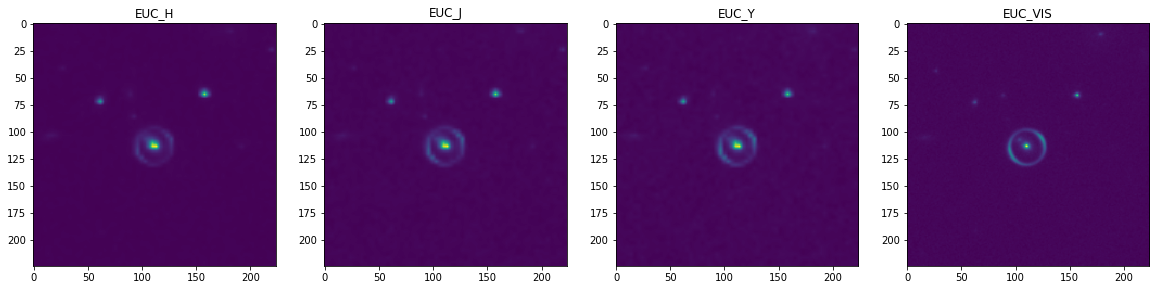

______
rotation_seed 1
Einstein_radius (ground truth) 4.781399
Einstein_radius prediction: 3.9144506
score tensor([0.8727], dtype=torch.float64)


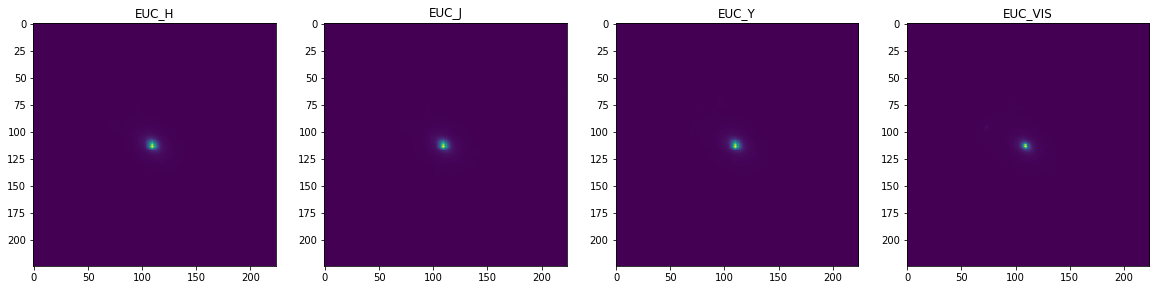

______
rotation_seed 2
Einstein_radius (ground truth) 3.772656
Einstein_radius prediction: 3.9057305
score tensor([0.9126], dtype=torch.float64)


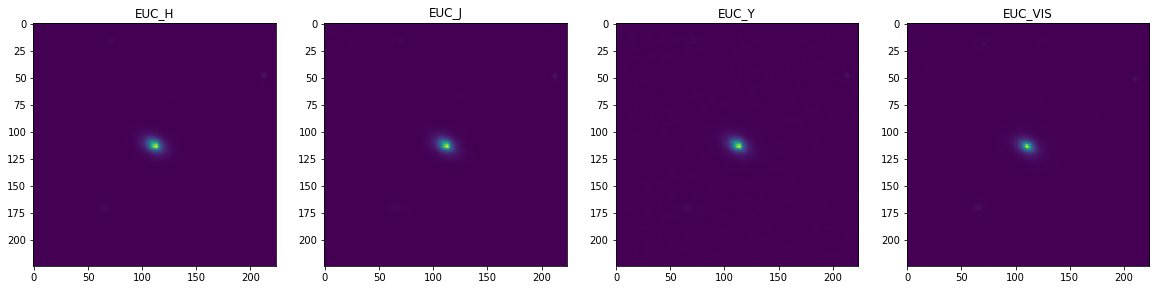

______
rotation_seed 2
Einstein_radius (ground truth) 5.289009
Einstein_radius prediction: 3.5505996
score tensor([0.9240], dtype=torch.float64)


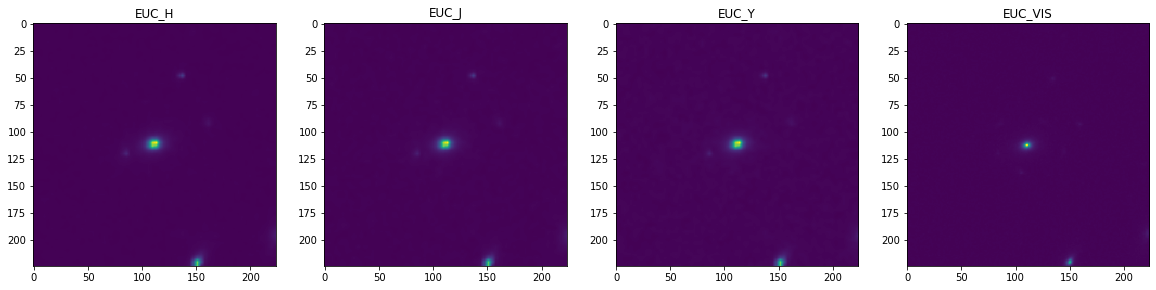

______
rotation_seed 2
Einstein_radius (ground truth) 2.8894453
Einstein_radius prediction: 3.4097075
score tensor([0.9312], dtype=torch.float64)


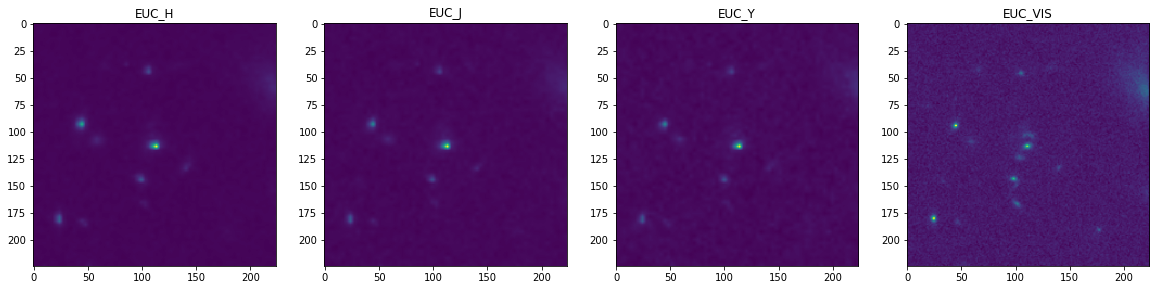

______
rotation_seed 3
Einstein_radius (ground truth) 4.3916583
Einstein_radius prediction: 3.7994988
score tensor([0.9994], dtype=torch.float64)


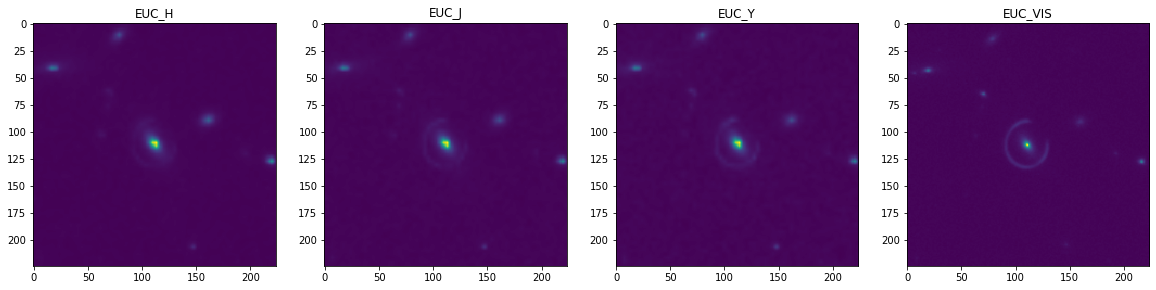

______
rotation_seed 1
Einstein_radius (ground truth) 8.252784
Einstein_radius prediction: 4.762453
score tensor([0.8567], dtype=torch.float64)


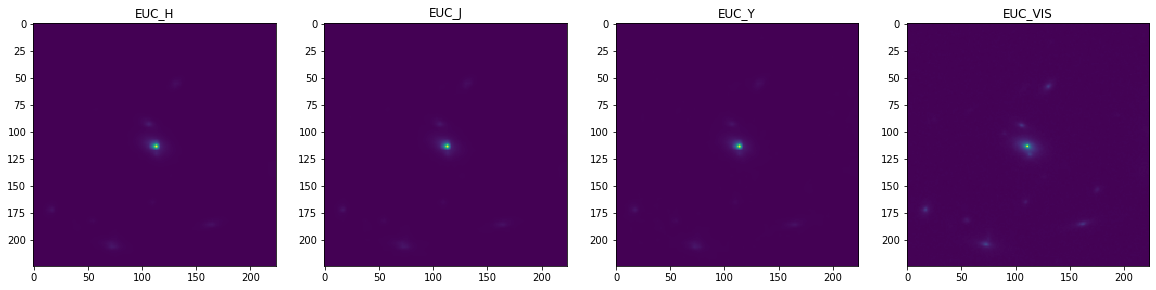

______
rotation_seed 2
Einstein_radius (ground truth) 2.2015133
Einstein_radius prediction: 2.62923
score tensor([0.9478], dtype=torch.float64)


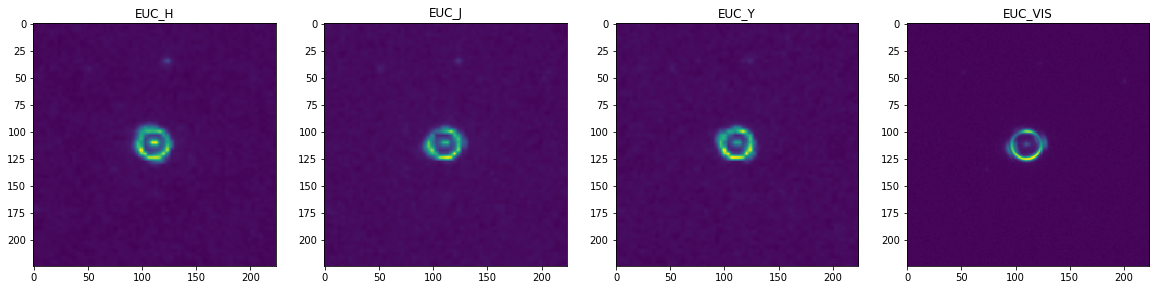

______
rotation_seed 1
Einstein_radius (ground truth) 4.8761234
Einstein_radius prediction: 4.9149323
score tensor([0.9995], dtype=torch.float64)


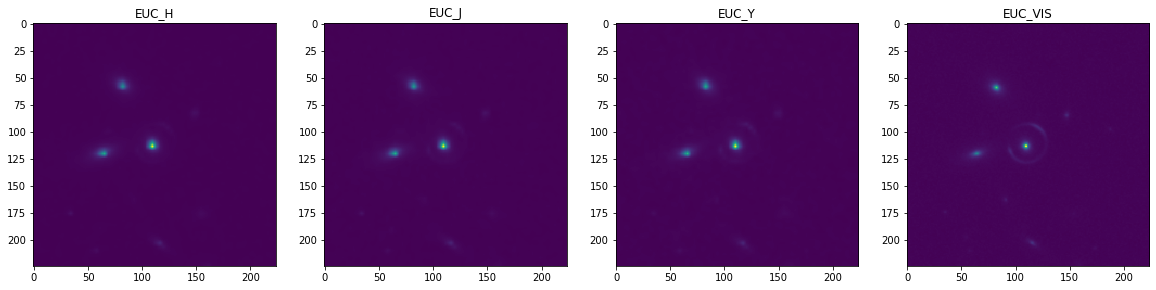

______
rotation_seed 0
Einstein_radius (ground truth) 5.3403945
Einstein_radius prediction: 4.4912124
score tensor([0.9210], dtype=torch.float64)


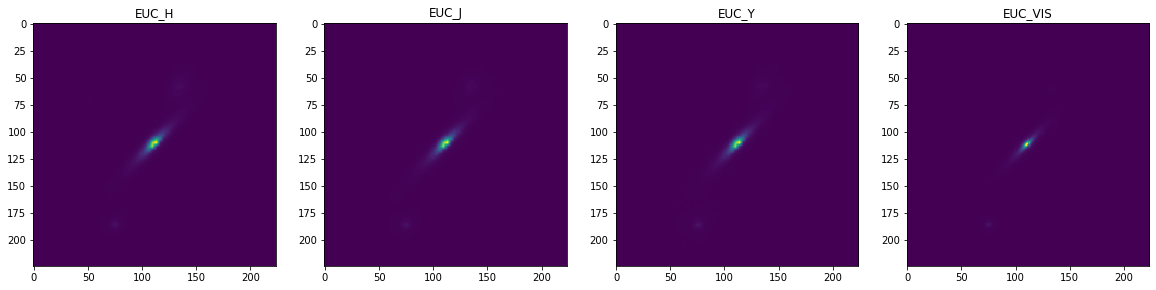

______
rotation_seed 1
Einstein_radius (ground truth) 4.578679
Einstein_radius prediction: 3.6571903
score tensor([0.9391], dtype=torch.float64)


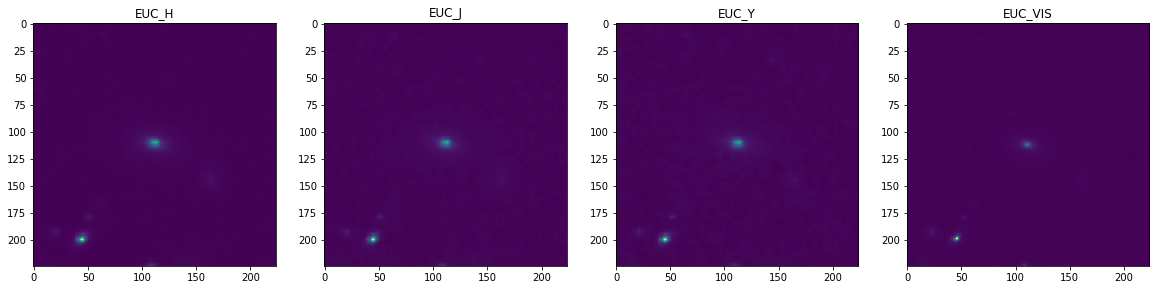

______
rotation_seed 1
Einstein_radius (ground truth) 3.9330971
Einstein_radius prediction: 3.3216255
score tensor([0.9903], dtype=torch.float64)


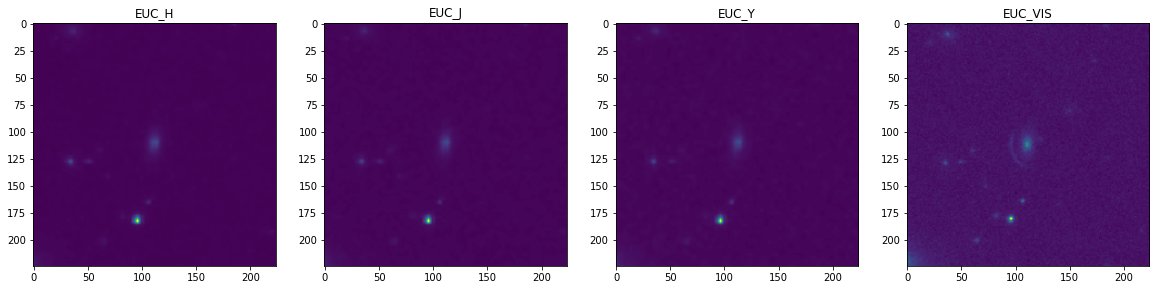

______
rotation_seed 3
Einstein_radius (ground truth) 8.591542
Einstein_radius prediction: 6.58048
score tensor([0.9816], dtype=torch.float64)


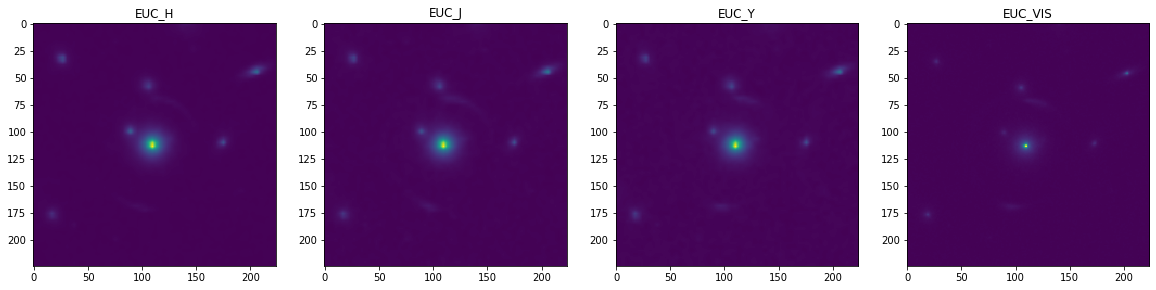

______
rotation_seed 0
Einstein_radius (ground truth) 2.6332836
Einstein_radius prediction: 3.1692297
score tensor([0.8646], dtype=torch.float64)


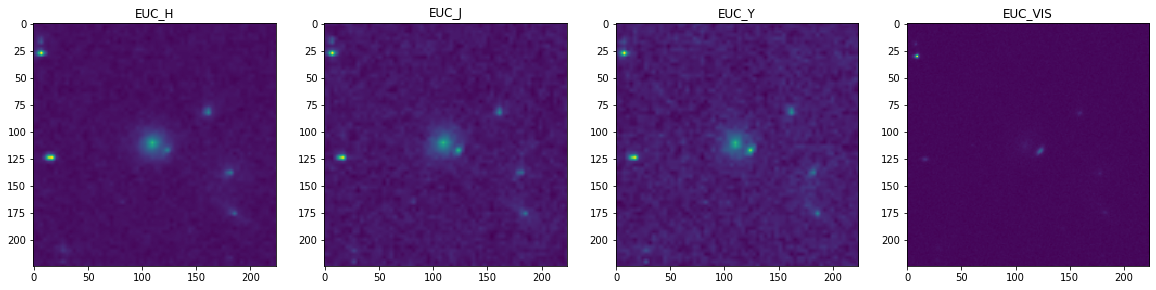

______
rotation_seed 0
Einstein_radius (ground truth) 2.8052924
Einstein_radius prediction: 3.0511622
score tensor([0.9960], dtype=torch.float64)


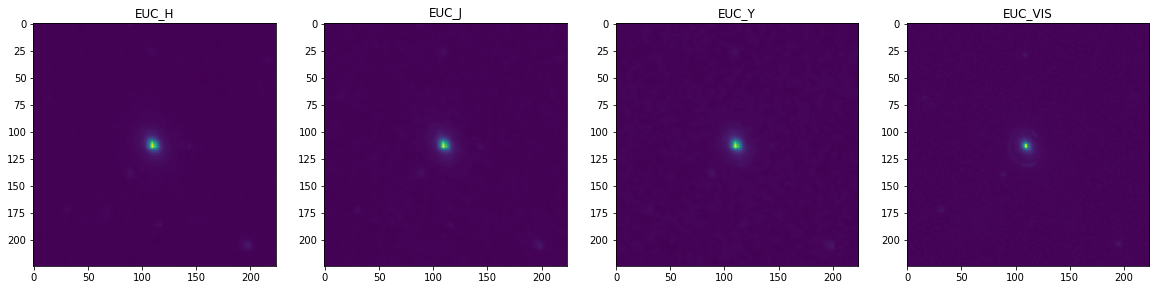

______
rotation_seed 0
Einstein_radius (ground truth) 3.1288202
Einstein_radius prediction: 3.2990782
score tensor([0.9218], dtype=torch.float64)


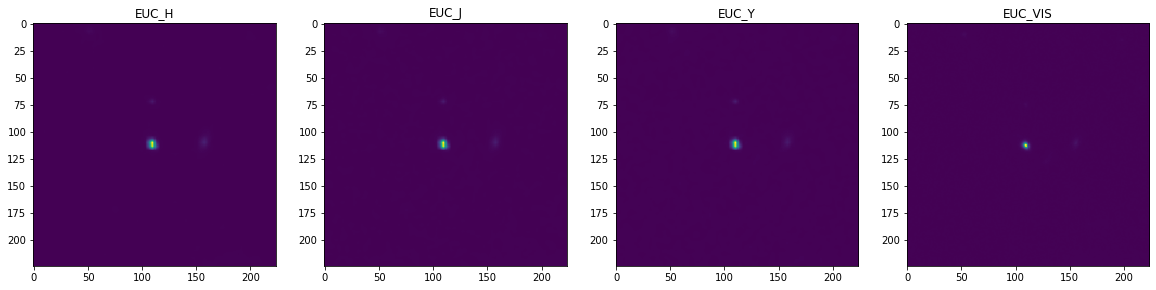

______
rotation_seed 1
Einstein_radius (ground truth) 3.1990201
Einstein_radius prediction: 3.5293603
score tensor([0.8176], dtype=torch.float64)


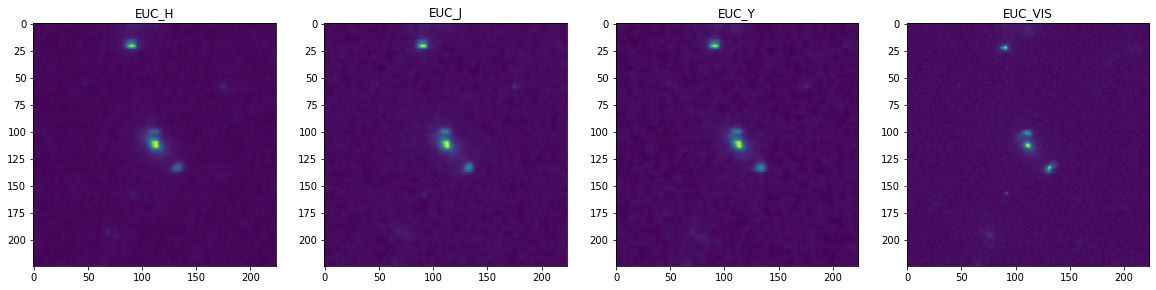

______
rotation_seed 1
Einstein_radius (ground truth) 2.8853047
Einstein_radius prediction: 2.5716028
score tensor([0.9195], dtype=torch.float64)


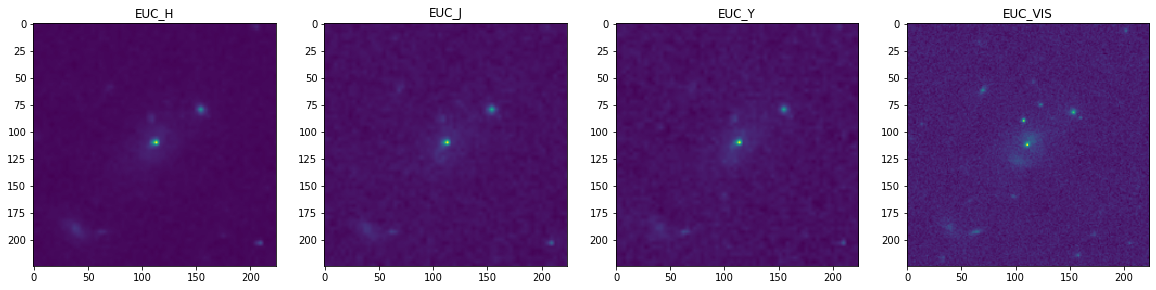

______
rotation_seed 0
Einstein_radius (ground truth) 7.3020945
Einstein_radius prediction: 5.8511267
score tensor([0.8540], dtype=torch.float64)


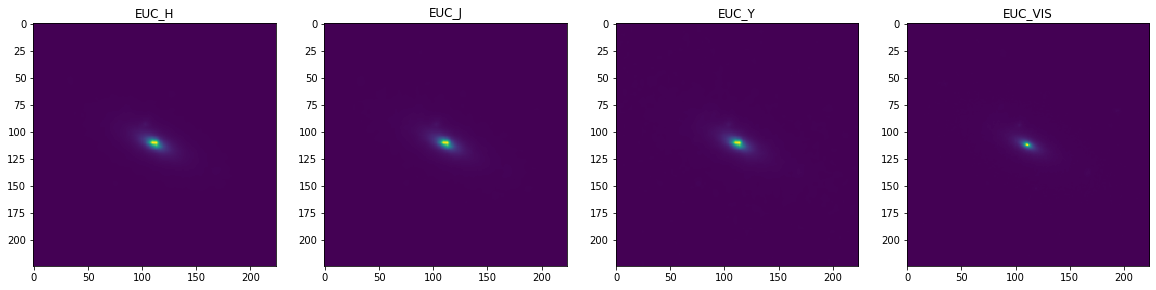

______
rotation_seed 0
Einstein_radius (ground truth) 8.338329
Einstein_radius prediction: 8.131523
score tensor([0.9951], dtype=torch.float64)


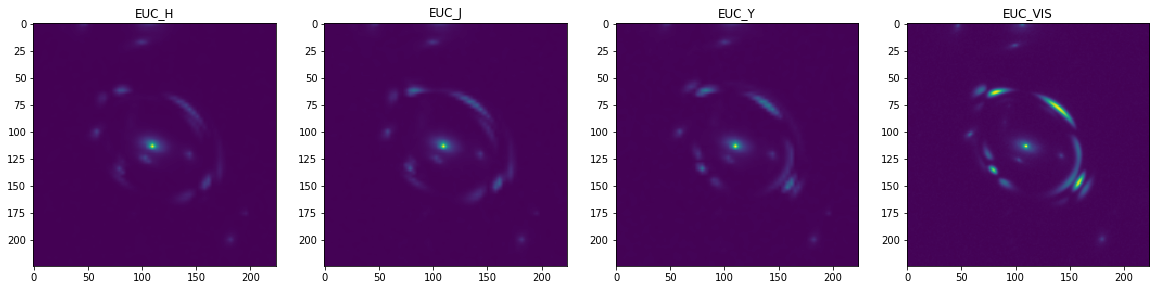

______
rotation_seed 1
Einstein_radius (ground truth) 2.839503
Einstein_radius prediction: 3.371347
score tensor([0.9050], dtype=torch.float64)


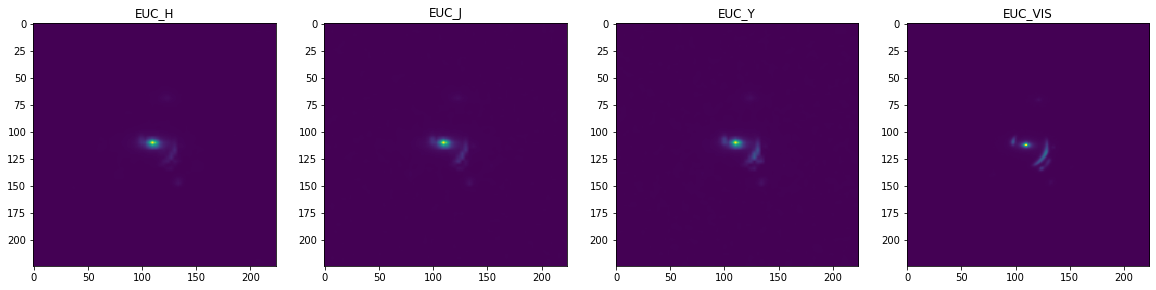

______
rotation_seed 2
Einstein_radius (ground truth) 3.4716885
Einstein_radius prediction: 3.5376182
score tensor([0.9942], dtype=torch.float64)


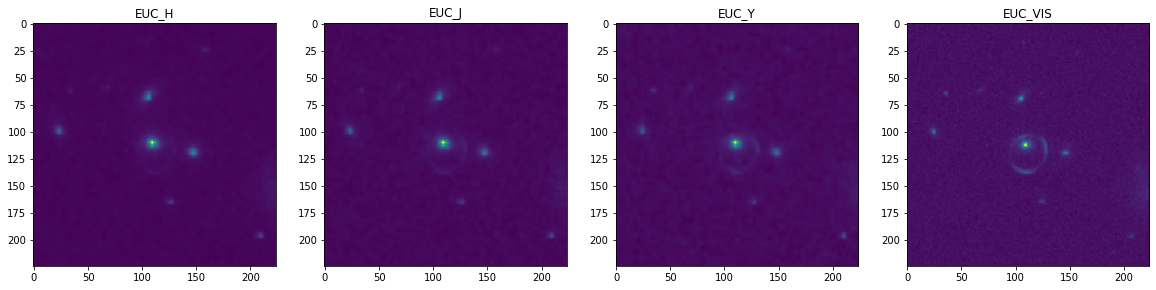

______
rotation_seed 0
Einstein_radius (ground truth) 3.4179766
Einstein_radius prediction: 3.2808163
score tensor([0.9916], dtype=torch.float64)


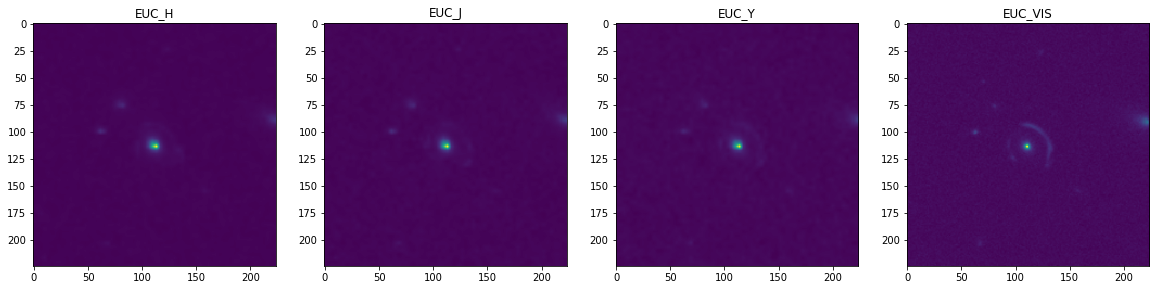

______
rotation_seed 3
Einstein_radius (ground truth) 3.5253606
Einstein_radius prediction: 3.3845217
score tensor([0.9786], dtype=torch.float64)


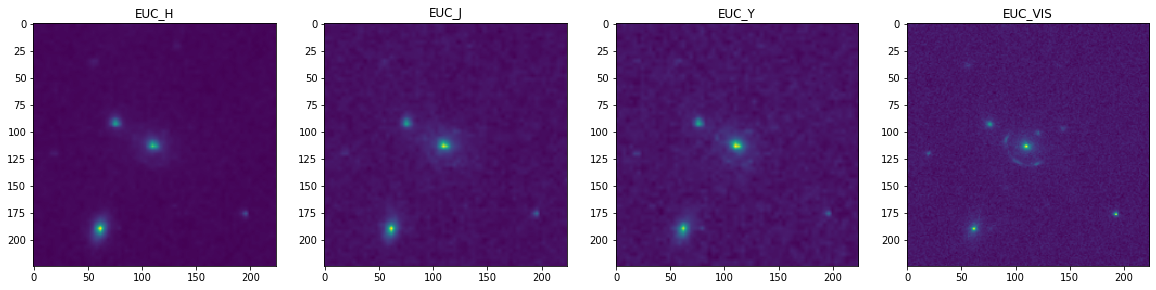

______
rotation_seed 0
Einstein_radius (ground truth) 2.4921107
Einstein_radius prediction: 2.877896
score tensor([0.8973], dtype=torch.float64)


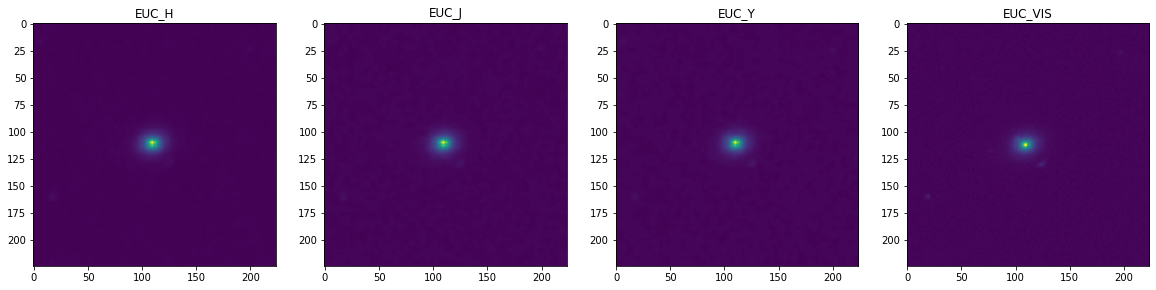

______


In [26]:
net.cuda()




for batch_idx, (data, ID, score, Einstein_radius) in enumerate(test_loader):
    data, target = data.float(), Einstein_radius.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    #output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] > 1.00:
    #if mag_eff[0] > 4.8:    
        print("Einstein_radius (ground truth)", target.cpu().numpy()[0][0])
        print("Einstein_radius prediction:", output.data.cpu().numpy()[0][0])
        print("score", score)
        
        image = np.zeros((4, 224, 224))
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        plt.figure(figsize=(20, 5))
        for i, channel in enumerate(channel_names):
            filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
            lens_data = fits.open(filepath)
            img = lens_data[0].data
            img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
            image[i, :, :] += img_channel_0
            plt.subplot(1, 4, i+ 1)
            plt.imshow(image[i, :, :])
            plt.title(channel)
        plt.show()
    print("______")

    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 30:
        break

In [27]:
net.cuda()


Einstein_radius_target_list = []
Einstein_radius_output_list = []
score_list = []

for batch_idx, (data, ID, score, Einstein_radius) in enumerate(test_loader):
    data, target = data.float(), Einstein_radius.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    #print("criteria (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    #output = F.sigmoid(output)
    
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
    if score.cpu().numpy()[0] >= 0.9:
    #if mag_eff[0] > 4.8:    
#         print("Einstein_radius (ground truth)", target.cpu().numpy()[0][0])
#         print("Einstein_radius prediction:", output.data.cpu().numpy()[0][0])
#         print("score", score)
    #print("criteria prediction:", output.data.cpu().numpy()[0][0])
    
   
    #if mag_eff[0] > 4.8:    
        #print("criteria (ground truth)", target.cpu().numpy()[0][0])
        #print("criteria prediction:", output.data.cpu().numpy()[0][0])
        Einstein_radius_target_list.append(target.cpu().numpy()[0][0])
        Einstein_radius_output_list.append(output.data.cpu().numpy()[0][0])
        score_list.append(score.cpu().numpy()[0])
        

    #print("______")

    
    
    
    if batch_idx > 300:
        break

rotation_seed 3
rotation_seed 2
rotation_seed 3
rotation_seed 1
rotation_seed 3
rotation_seed 3
rotation_seed 1
rotation_seed 1
rotation_seed 2
rotation_seed 2
rotation_seed 0
rotation_seed 1
rotation_seed 0
rotation_seed 1
rotation_seed 1
rotation_seed 3
rotation_seed 3
rotation_seed 0
rotation_seed 2
rotation_seed 2
rotation_seed 3
rotation_seed 1
rotation_seed 1
rotation_seed 2
rotation_seed 3
rotation_seed 0
rotation_seed 1
rotation_seed 2
rotation_seed 0
rotation_seed 3
rotation_seed 0
rotation_seed 3
rotation_seed 2
rotation_seed 2
rotation_seed 2
rotation_seed 3
rotation_seed 2
rotation_seed 1
rotation_seed 2
rotation_seed 2
rotation_seed 2
rotation_seed 0
rotation_seed 1
rotation_seed 3
rotation_seed 1
rotation_seed 0
rotation_seed 1
rotation_seed 2
rotation_seed 3
rotation_seed 2
rotation_seed 1
rotation_seed 2
rotation_seed 0
rotation_seed 3
rotation_seed 2
rotation_seed 0
rotation_seed 2
rotation_seed 1
rotation_seed 1
rotation_seed 0
rotation_seed 2
rotation_seed 1
rotation

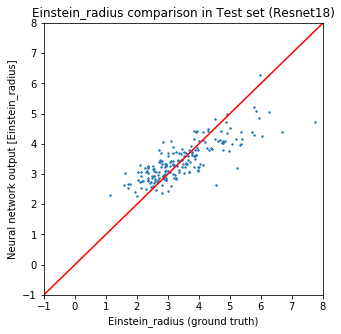

In [28]:
scale= np.linspace(-1, 8 ,100)
plt.figure(figsize=(5, 5))        
plt.scatter(Einstein_radius_target_list, Einstein_radius_output_list, s = 2)
plt.plot(scale, scale, "r")
plt.title("Einstein_radius comparison in Test set (Resnet18)")
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.xlabel("Einstein_radius (ground truth)")
plt.ylabel("Neural network output [Einstein_radius]")
plt.savefig("./" + "scatter_plot.png")
plt.show()
